In [1]:
from typing_extensions import TypedDict

class State(TypedDict):
    message: str
    sentiment: str

In [ ]:
def analyze_sentiment(state):
    print("---Analyzing Sentiment---")
    text = state["message"].lower()
    
    # Simple sentiment analysis
    if any(word in text for word in ["good", "great", "happy"]):
        return {"sentiment": "positive"}
    if any(word in text for word in ["bad", "sad", "terrible", "not good"]):
        return {"sentiment": "negative"}
    return {"sentiment": "neutral"}

def positive_response(state):
    print("---Positive Response---")
    return {"message": "Thank you for the positive feedback! 😊"}

def negative_response(state):
    print("---Negative Response---")
    return {"message": "We’re sorry to hear that. How can we improve? 😞"}

In [3]:
from typing import Literal

def sentiment_router(state) -> Literal["positive_response", "negative_response"]:
    if state["sentiment"] == "positive":
        return "positive_response"
    return "negative_response"

In [4]:
from langgraph.graph import StateGraph, START, END

# Initialize graph
builder = StateGraph(State)

# Add nodes
builder.add_node("analyze_sentiment", analyze_sentiment)
builder.add_node("positive_response", positive_response)
builder.add_node("negative_response", negative_response)

# Add edges
builder.add_edge(START, "analyze_sentiment")
builder.add_conditional_edges("analyze_sentiment", sentiment_router)
builder.add_edge("positive_response", END)
builder.add_edge("negative_response", END)

# Compile graph
graph = builder.compile()

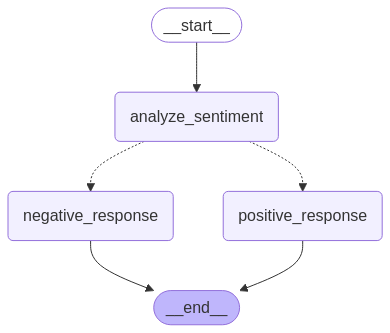

In [5]:
# Visualize your graph
from IPython.display import Image, display
png = graph.get_graph().draw_mermaid_png()

display(Image(png))

In [6]:
# Invoke the graph with input
result = graph.invoke({"message": "I had a great experience!"})

print(result)

---Analyzing Sentiment---
---Positive Response---
{'message': 'Thank you for the positive feedback! 😊', 'sentiment': 'positive'}


In [9]:
result = graph.invoke({"message": "Support not good."})

print(result)

---Analyzing Sentiment---
---Positive Response---
{'message': 'Thank you for the positive feedback! 😊', 'sentiment': 'positive'}
